In [1]:
# importing the pandas library
import pandas as pd
 
# reading the csv file using read_csv
# storing the data frame in variable called df
df = pd.read_csv('adata.csv')
 
# creating a list of column names by
# calling the .columns
list_of_column_names = list(df.columns)
 
# displaying the list of column names
print('List of column names : ',
      list_of_column_names)

List of column names :  ['Date', 'cogs', 'Unit price']


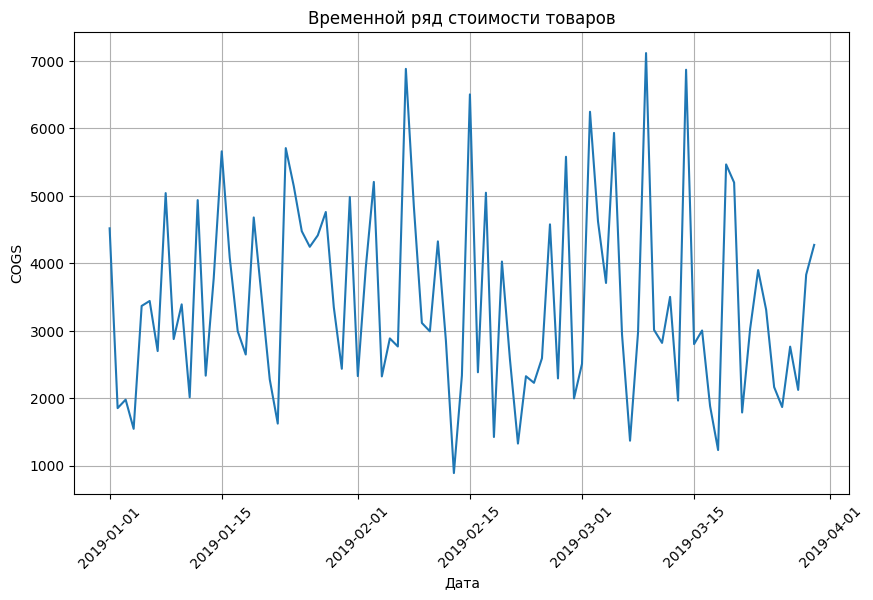

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV файла
data = pd.read_csv('adata.csv')

# Преобразование столбца 'Date' в формат даты
data['Date'] = pd.to_datetime(data['Date'])

# Агрегация данных по датам и столбцу 'cogs'
aggregated_data = data.groupby('Date')['cogs'].sum()

# Построение временного ряда
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data.index, aggregated_data)
plt.xlabel('Дата')
plt.ylabel('COGS')
plt.title('Временной ряд стоимости товаров')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


In [9]:
import warnings
warnings.filterwarnings("ignore")

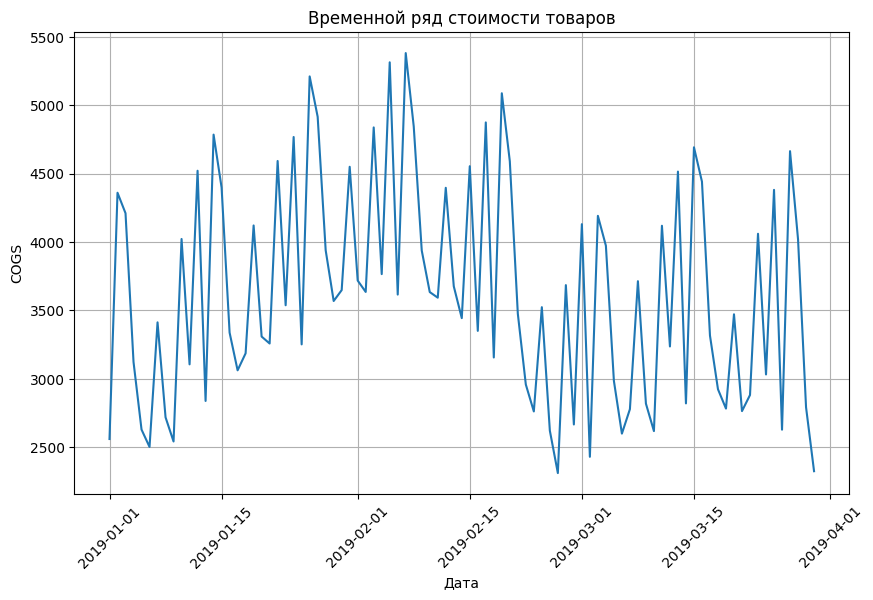

In [10]:
from statsmodels.tsa.api import ExponentialSmoothing

# Создание модели экспоненциального сглаживания
model = ExponentialSmoothing(aggregated_data, trend='add', seasonal='add', seasonal_periods=12)

# Обучение модели
model_fit = model.fit()

# Сглаженные значения ряда
aggregated_data = model_fit.fittedvalues

# Построение временного ряда
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data.index, aggregated_data)
plt.xlabel('Дата')
plt.ylabel('COGS')
plt.title('Временной ряд стоимости товаров')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


In [11]:
from statsmodels.tsa.api import SimpleExpSmoothing
# Создание буферного ряда
buffer_data = aggregated_data.copy()[:-30]

# Применение алгоритма на основе экспоненциального сглаживания к буферному ряду
for _ in range(30):
    # Создание модели экспоненциального сглаживания
    model = SimpleExpSmoothing(buffer_data)
    
    # Обучение модели
    model_fit = model.fit()
    
    # Прогнозирование следующего значения
    forecast = model_fit.forecast(steps=1)
    
    # Добавление прогнозного значения в конец буферного ряда
    buffer_data = buffer_data._append(forecast)
    
    
# Отображение прогнозных значений простого экспоненциального сглаживания
# Удаление исходных данных из buffe_data
buffer_data_0 = buffer_data.iloc[-30:]


In [12]:
from statsmodels.tsa.api import Holt
# Создание буферного ряда
buffer_data = aggregated_data.copy()[:-30]

# Применение алгоритма на основе экспоненциального сглаживания к буферному ряду
for _ in range(30):
    # Создание модели экспоненциального сглаживания
    model = Holt(buffer_data)
    
    # Обучение модели
    model_fit = model.fit()
    
    # Прогнозирование следующего значения
    forecast = model_fit.forecast(steps=1)
    
    # Добавление прогнозного значения в конец буферного ряда
    buffer_data = buffer_data._append(forecast)
    
    
# Отображение прогнозных значений простого экспоненциального сглаживания
# Удаление исходных данных из buffer_data
buffer_data_1 = buffer_data.iloc[-30:]


In [13]:
from statsmodels.tsa.api import ExponentialSmoothing
# Создание буферного ряда
buffer_data = aggregated_data.copy()[:-30]

# Применение алгоритма на основе экспоненциального сглаживания к буферному ряду
for _ in range(30):
    # Создание модели экспоненциального сглаживания
    model = ExponentialSmoothing(buffer_data, seasonal='add', seasonal_periods=29)
    
    # Обучение модели
    model_fit = model.fit()
    
    # Прогнозирование следующего значения
    forecast = model_fit.forecast(steps=1)
    
    # Добавление прогнозного значения в конец буферного ряда
    buffer_data = buffer_data._append(forecast)
    
    
# Отображение прогнозных значений простого экспоненциального сглаживания
# Удаление исходных данных из buffer_data
buffer_data_2 = buffer_data.iloc[-30:]


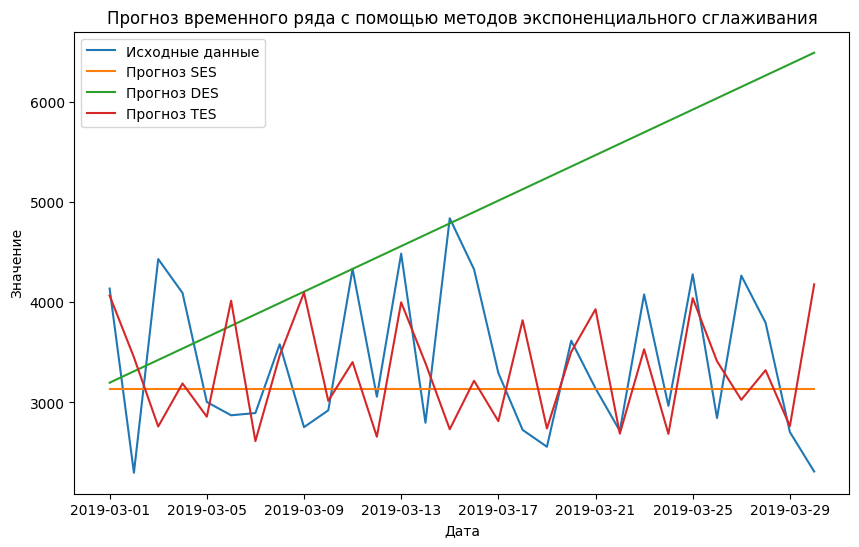

In [25]:
# Создание объекта Figure и осей для графика
fig, ax = plt.subplots(figsize=(10, 6))

# Отображение исходных данных временного ряда
ax.plot(aggregated_data[-30:].index, aggregated_data[-30:].values, label='Исходные данные')

ax.plot(buffer_data_0, label='Прогноз SES')
ax.plot(buffer_data_1, label='Прогноз DES')
ax.plot(buffer_data_2, label='Прогноз TES')

# Настройка осей и легенды
ax.set_xlabel('Дата')
ax.set_ylabel('Значение')
ax.set_title('Прогноз временного ряда с помощью методов экспоненциального сглаживания')
ax.legend()

# Отображение графика
plt.show()


In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt
a = aggregated_data[-30:].mean()
rmse_ses=sqrt(mean_squared_error(buffer_data_0,aggregated_data[-30:]))
rmse_des=sqrt(mean_squared_error(buffer_data_1,aggregated_data[-30:]))
rmse_tes=sqrt(mean_squared_error(buffer_data_2,aggregated_data[-30:]))
print(f"ses {rmse_ses / a}, \n des {rmse_des / a}, \n tes {rmse_tes / a}")

plt.show()


ses 0.23009340653000668, 
 des 0.5666860840170108, 
 tes 0.2603507487982937


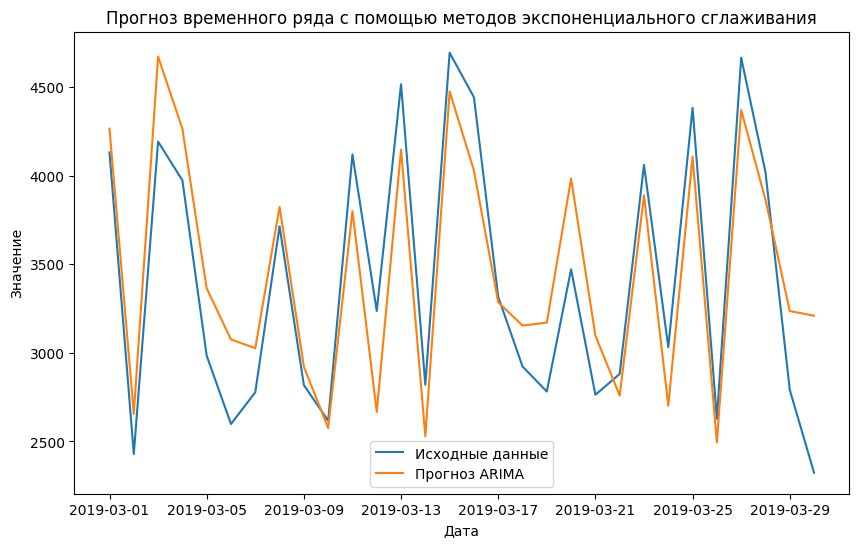

In [15]:
from statsmodels.tsa.arima.model import ARIMA

train = aggregated_data.copy()[:-30]
test = aggregated_data.copy()[:30]
model=ARIMA(train,order=(12,0,7))
model=model.fit()
model.summary()
start=len(train)
end=len(train)+len(test) -1 
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')


# Создание объекта Figure и осей для графика
fig, ax = plt.subplots(figsize=(10, 6))

# Отображение исходных данных временного ряда
ax.plot(aggregated_data[-30:].index, aggregated_data[-30:].values, label='Исходные данные')

ax.plot(pred, label='Прогноз ARIMA')

# Настройка осей и легенды
ax.set_xlabel('Дата')
ax.set_ylabel('Значение')
ax.set_title('Прогноз временного ряда с помощью методов экспоненциального сглаживания')
ax.legend()

# Отображение графика
plt.show()



In [145]:
from sklearn.metrics import mean_squared_error
from math import sqrt
a = test.mean()
rmse=sqrt(mean_squared_error(pred,aggregated_data[-30:]))
print("arima: ", rmse / a)


arima:  0.07572371917922249


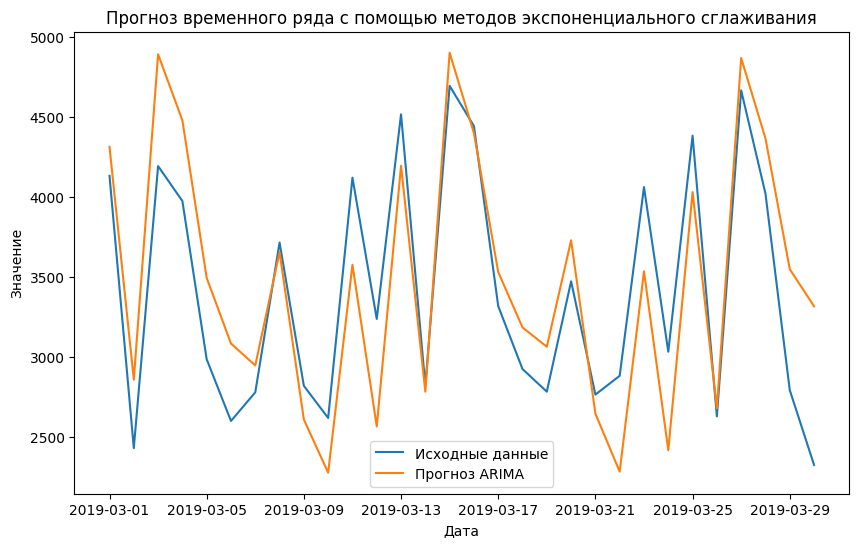

In [17]:
from statsmodels.tsa.arima.model import ARIMA

aggregated_price = data['Unit price'].values[:59]
model=ARIMA(train, exog = aggregated_price, order=(12,0,6))
model=model.fit()
model.summary()
start=len(train)
end=len(train)+len(test) -1 
pred=model.predict(start=start,end=end, exog = aggregated_price[-30:], typ='levels').rename('ARIMA Predictions')

# Создание объекта Figure и осей для графика
fig, ax = plt.subplots(figsize=(10, 6))

# Отображение исходных данных временного ряда
ax.plot(aggregated_data[-30:].index, aggregated_data[-30:].values, label='Исходные данные')

ax.plot(pred, label='Прогноз ARIMA')

# Настройка осей и легенды
ax.set_xlabel('Дата')
ax.set_ylabel('Значение')
ax.set_title('Прогноз временного ряда с помощью методов экспоненциального сглаживания')
ax.legend()

# Отображение графика
plt.show()


In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt
a = test.mean()
rmse=sqrt(mean_squared_error(pred,aggregated_data[-30:]))
print("arimax: ",rmse / a)

arimax:  0.07572371917922249
